# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [4]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [5]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [6]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.head(1)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

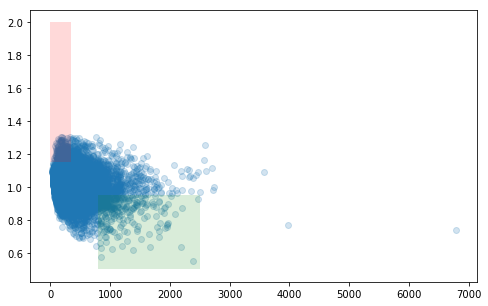

In [7]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

# Your turn

    Analysis: 

    As per the direction provided to us, we shall limit our analysis to the following 
        1) Understand the relationship between rate of readmissions and number of discharges(capacity)
        2) Difference in Rate of readmissions between small hospitals (Number of discharges < 100) and large hospitals (Number of discharges > 1000)
        3) Draw conclusions based on above analysis 
        4) Provide Regualtory policy recommendations  



## Loading and cleaning data

In [8]:
#read the dataset provided
hospitals = pd.read_csv('data/cms_hospital_readmissions.csv')
hospitals.columns

Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

 * The formula for calculating Excess Readmission Ratio as per CMS is as follows:
         * Excess readmission ratio = risk-adjusted predicted readmissions/risk-adjusted expected readmissions
    

In [114]:
#Retaining necessary variables from original dataset
hospitals_clean= hospitals[['Number of Discharges','Excess Readmission Ratio']]

In [181]:
# Dropping missing values
hospitals_clean = data.replace(to_replace= 'NaN' , value=np.nan)

In [182]:
hospitals_clean =  hospitals_clean.dropna(axis = 0)

In [186]:
# Dealing with missing values
hospitals_clean = hospitals_clean[(hospitals_clean['Number of Discharges'] != 'Not Available')]
hospitals_clean.tail()

,Number of Discharges,Excess Readmission Ratio
13725,852,0.6322
13727,1032,0.6262
13728,1379,0.6195
13729,843,0.5748
13730,2393,0.5495


## Understanding the variables : Number of Discharges and Excess Readmission Ratio

count    11497.000000
mean         1.007504
std          0.091964
min          0.549500
25%          0.952600
50%          1.003500
75%          1.058100
max          1.909500
Name: Excess Readmission Ratio, dtype: float64

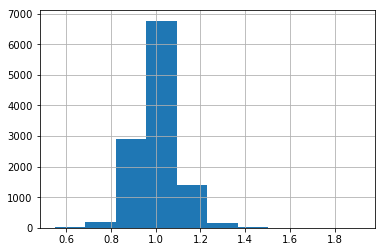

In [187]:
# Plot a density graph to see the distribution of Excess Readmission Ratio sample data
capacity = list(hospitals_clean['Number of Discharges'])
excess_readm = hospitals_clean['Excess Readmission Ratio']

excess_readm.hist()
excessreadm.describe()

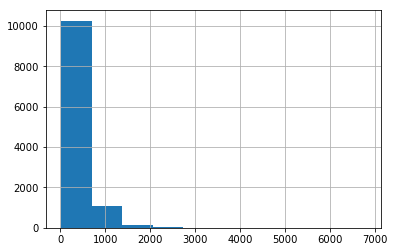

In [188]:
hospitals_clean['Number of Discharges'].astype(int).hist()

In [208]:
hospitals_clean['Number of Discharges'].astype(int).sort_values().head()

1832    25
1699    27
1774    28
1853    29
1290    30
Name: Number of Discharges, dtype: int64

In [206]:
hospitals_clean['Number of Discharges'].astype(int).sort_values().tail()

8126     2716
6643     2740
1892     3570
13615    3980
13666    6793
Name: Number of Discharges, dtype: int64

In [216]:
# Number of small hospitals
hospitals_clean[hospitals_clean['Number of Discharges'].astype(int) < 100].count()

Number of Discharges        1188
Excess Readmission Ratio    1188
dtype: int64

In [217]:
# Number of large hospitals
hospitals_clean[hospitals_clean['Number of Discharges'].astype(int) > 1000].count()

Number of Discharges        463
Excess Readmission Ratio    463
dtype: int64

* The average Excess Readmissions rate across hospitals is around 1.007 with a standard deviation of 0.09.
* From the above graph we can say that majority of hospitals fall under the rate of 1.2 i.e have less than 20% excess readmisions than expected (Excess Readmissions rate < 1.2).
* Atleast 75% of hospitals have Excess readmissions rate close to 1.
* Data from 1188 small hospitals and 463 large hospitals have been made available to us. Remaining 9864 are mid-sized hospitals.

## Relationship between Number of Discharges and Excess Readmission Ratio

In [160]:
#% distribution of hospitals based on excess readmissions ratio cutoff at 1
high_readm = excess_readm[excessreadm > 1]
low_readm = excess_readm[excessreadm <= 1]
print("% of hospitals with excess Readmissions:",round(high_readm.size/11497*100),"%")
print("% of hospitals with expected or lower than expected readmissions:",round(low_readm.size/11497*100),"%")

% of hospitals with excess Readmissions: 52 %
% of hospitals with expected or lower than expected readmissions: 48 %


52% of the hospitals have excess readmissions. 

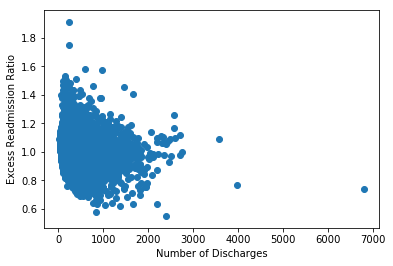

In [209]:
# Relationship between Excess Readmission rate and Number of Discharges
plt.scatter(discharges,excessreadm)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')

* From the visual plot we can conclude that there is no linear/non-linear relationship between Number of Discharges and Excess Readmission rates.
* Hence it would not be proper to attribute changes in excessive readmissions to capacity of hospitals.
* Many factors could come into play in determining the actual root cause.We shall discuss such factors external to this dataset at the end of this analysis.
* Majority of hospitals have excess readmission rates between 0.7 to 1.3.

In [218]:
high_readm_1 = hospitals_clean[hospitals_clean['Excess Readmission Ratio']>1]
low_readm_1 = hospitals_clean[hospitals_clean['Excess Readmission Ratio']<1]

In [219]:
x1 = list(high_readm_1['Number of Discharges'])
y1 = high_readm_1['Excess Readmission Ratio']

x2 = list(low_readm_1['Number of Discharges'])
y2 = low_readm_1['Excess Readmission Ratio']

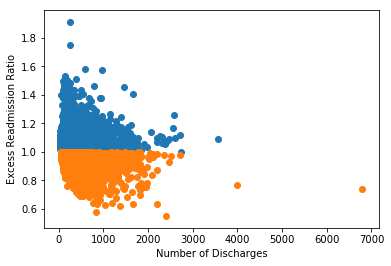

In [220]:
plt.scatter(x1,y1)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')


plt.scatter(x2,y2)
plt.xlabel('Number of Discharges')
plt.ylabel('Excess Readmission Ratio')



## Is there a difference in Excess Readmission ratio for small and large hospitals?

As per the data, hospitals with Number of discharges < 100 are defined as small and those with Number of discharges > 1000 are defined as large.

In [242]:
# Creating datasets for large and small hospitals
large_hosp = hospitals_clean[hospitals_clean['Number of Discharges'].astype(int) > 1000]
small_hosp = hospitals_clean[hospitals_clean['Number of Discharges'].astype(int) <= 100]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12b465d30>]], dtype=object)

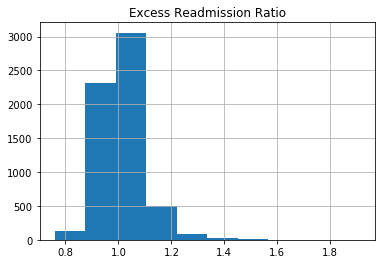

In [243]:
# Statistics of small hospitals
small_hosp.hist()

In [244]:
# Small Hospitals with excess Readmissions rate > 1
small_hosp_1 = pd.DataFrame(small_hosp['Excess Readmission Ratio'] > 1)
small_hosp_1.groupby('Excess Readmission Ratio').size()

Excess Readmission Ratio
False    2834
True     3298
dtype: int64

In [245]:
print("% of small hospitals with Excess Readmission Ratio > 1 is: ", round(766/(538+766)*100),"%")
print("Mean Excess Readmissions Ratio is:", small_hosp['Excess Readmission Ratio'].mean())

% of small hospitals with Excess Readmission Ratio > 1 is:  59 %
Mean Excess Readmissions Ratio is: 1.0142605512067822


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a987c88>]], dtype=object)

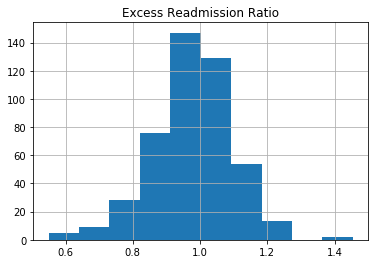

In [241]:
# Statistics of large hospitals
large_hosp.hist()

In [233]:
# Large Hospitals with excess Readmissions rate > 1
large_hosp_1 = pd.DataFrame(large_hosp['Excess Readmission Ratio'] > 1)
large_hosp_1.groupby('Excess Readmission Ratio').size()

Excess Readmission Ratio
False    257
True     206
dtype: int64

In [238]:
print("% of large hospitals with Excess Readmission Ratio > 1 is: ", round(206/(206+257)*100),"%")
print("Mean Excess Readmissions Ratio is:", large_hosp['Excess Readmission Ratio'].mean())

% of large hospitals with Excess Readmission Ratio > 1 is:  44 %
Mean Excess Readmissions Ratio is: 0.9783354211663071


* 59% of small hospitals have excessive readmissions compared to 44% in large hospitals.
* The average Excess Admission Ratio incase of smaller hospitals is 1.02 and incase of larger hospitals is 0.98
* This points to a fact that the readmissions happen in excess in smaller hospitals and within expected limits in larger hospitals
* Inorder to find out if this difference is really significnat, let us conduct a t-test for these two sample groups

#### Hypothesis for a two sample t-test between Excess Readmission Ratios of small and large hospitals
    Ho : Mean Excess Readmission Ratio in smaller hospitals = Mean Excess Readmission Ratio in larger hospitals
    H1 : Mean Excess Readmission Ratio in smaller hospitals != Mean Excess Readmission Ratio in larger hospitals

In [45]:
from scipy import stats

large_hosp_t= pd.DataFrame(large_hosp["Excess Readmission Ratio"])
small_hosp_t = pd.DataFrame(small_hosp["Excess Readmission Ratio"])

twosample_results = stats.ttest_ind(large_hosp_t, small_hosp_t,equal_var=True)
twosample_results

Ttest_indResult(statistic=array([-10.0188138]), pvalue=array([  5.46757046e-23]))

#### Two-sample T-test Conclusion
     1. Since p-value < Alpha of 0.05, Ho is rejected.
     2. We can conclude that there is a statistically significant difference in the Mean Excess Readmission Ratio in smaller and larger hospitals. 
     3. Also, since the t-statistic is negative it indicates that the Mean Excess Readmission Ratio of larger hospitals is less than that of smaller hospitals. 

* We can conclude that smaller hospitals tend to have more readmissions compared to larger ones 

______________________________________________________________________________________________________________________

## Conclusions based on analysis done so far

* There is no correlation between Excess Rate of readmissions and the size of hospitals and hence no conclusions can be drawn from this combination.
* Based on the results from the two sample t-test, we can confidently say that smaller hospitals tend to have higher rates of readmisions compared to larger ones.
* Is it becacause smaller hospitals have lower quality of treatment as they cannot afford to hire quality doctors, equipment or qualified people for maintaining their facilities? 
* With limited data made available to us, it is not possible to draw any concrete conclusions on the factors that could have resulted in the difference in readmission rates between the two groups. Many factors affect the quality of treatment provided to patients in hospitals. Few of them might include 
    - Geographic location - state, city
    - Customer demographics - Age, race, sex
    - Operational efficiencies of hospitals - capacity planning, Quality equipment, adequate & experienced staff
    - Medical conditions of patients - pre-medical conditions before being eligible for medicare program, any inter related health issues, diabetes, High BP, etc
    - Quality of doctors - Education, Number of surgeries performed, No. of patients treated for similar symptoms in the past
* Apart from these, programs like Medicare tend to be exploited by hospitals/facilities as the government cannot keep a track on each and every patient's health record and history. Hospitals could take advantage of this and try to increase readmits.
    

* For future study, collecting as many attributes as possible will help in identifying the right factors causing excessive readmissions in hospitals. A cluster analysis can then be made to get an idea of all the combination of attributes that are causing it to happen.  
* Based on that analysis, incentives can be given to those who are providing quality care to medicare eligible patients and maintaining low readmission rates while fines can be levied on those who are being inefficient. 
* It will also be beneficial to collect feedback about the treatment given to all the eligible patients inorder to find out if the patients are able to make the best out of such govt.-aided programs.

